## Observations and Insights 
1. According to the data and graphs generated, it is fair to say that the Capomulin and Ramicate drug Regimen had the opportunity to be tested more times than the other drugs.
2. There is a strong correlation between mice weight and Tumor size, meaning that overweight mice tent to develop bigger Tumors.
3. Capomulin Drug regimen seems to be the more prominent drug for tumor treatment in mice, in the boxplot graph we can observe that the data for this drug doesn’t have any outliers and behaves normally.
4. Even though Capomulin Drug was the regimen showing better results, it is necessary to compare it with the placebo treatment as well as keep track of the starting and ending tumor size across all the different treatments so we can know exactly in what percentage could the tumors be reduced over certain period.  



In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
mouseandstudy= pd.merge(mouse_metadata,study_results, on="Mouse ID", how='outer')
# Display the data table for preview
mouseandstudy


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Checking the number of mice.
numberofmice=len(mouseandstudy["Mouse ID"].value_counts())
numberofmice

249

In [86]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupid=mouseandstudy[mouseandstudy[["Mouse ID",'Timepoint']].duplicated() == True]
dupid


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [87]:
# Optional: Get all the data for the duplicate mouse ID. 
dupidinfo=mouseandstudy.loc[(mouseandstudy["Mouse ID"] == "g989")]
dupidinfo

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [88]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#I decided to delete all the info of the dup mice because if I deleted only the dup info for ID and Timepoint the analysis would be biased
cleanmicestudy= pd.DataFrame(mouseandstudy.loc[(mouseandstudy['Mouse ID'] != 'g989')])

In [89]:
# Checking the number of mice in the clean DataFrame.
len(cleanmicestudy["Mouse ID"].value_counts())


248

## Summary Statistics

In [90]:
drugregimenstudy= cleanmicestudy.groupby(['Drug Regimen'])
#stats = drugregimenstudy["Tumor Volume (mm3)"].describe()
#stats
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean=drugregimenstudy["Tumor Volume (mm3)"].mean()
median=drugregimenstudy["Tumor Volume (mm3)"].median()
var=drugregimenstudy["Tumor Volume (mm3)"].var()
sdev=drugregimenstudy["Tumor Volume (mm3)"].std()
SEM=drugregimenstudy["Tumor Volume (mm3)"].sem(ddof=0)

sum_tumorstats = pd.DataFrame({
                        "Mean":mean,
                        "Median" :median,
                        "Variance" :var,
                        "Standard Deviation" :sdev,
                        "SEM":SEM})
sum_tumorstats
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.328629
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.468499
Infubinol,52.884795,51.820584,43.128684,6.567243,0.490851
Ketapril,55.235638,53.698743,68.553577,8.279709,0.602252
Naftisol,54.331565,52.509285,66.173479,8.134708,0.594860
Placebo,54.033581,52.288934,61.168083,7.821003,0.579722
Propriva,52.320930,50.446266,43.852013,6.622085,0.542490
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320250
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.571526


In [91]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sumtumorstats2=cleanmicestudy.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
sumtumorstats2
# Using the aggregation method, produce the same summary statistics in a single line

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [92]:
%matplotlib notebook
%matplotlib inline

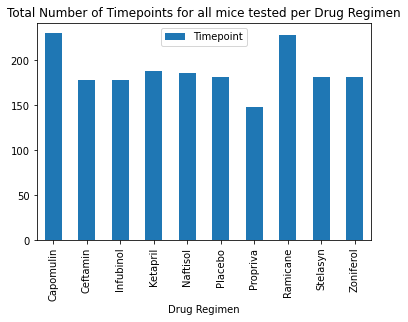

In [93]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

timebydrug=pd.DataFrame(cleanmicestudy.groupby(['Drug Regimen'])['Timepoint'].count())

timebydrug.plot(kind='bar',title="Total Number of Timepoints for all mice tested per Drug Regimen")

plt.savefig("graphs/barusingpandas.png", bbox_inches = "tight")
plt.show()

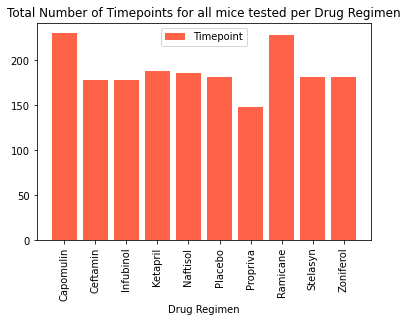

In [94]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#using the same groupby as info source
x_axis=np.arange(len(timebydrug))

tick_locations=[name for name in x_axis]

plt.bar(x_axis,timebydrug['Timepoint'],color="tomato",align='center')

plt.xticks(x_axis,timebydrug.index,rotation="vertical")
plt.title("Total Number of Timepoints for all mice tested per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.legend(['Timepoint'],loc="best")
plt.savefig("graphs/barusingpyplot.png", bbox_inches = "tight")
plt.show()

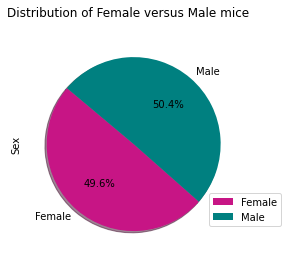

In [95]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=pd.DataFrame(cleanmicestudy.groupby(['Sex'])["Mouse ID"].value_counts())
#I decided to get the sex of the mice per each specific Mouse ID so there is no room for skewed 
                     
female=len(sex.loc["Female","Mouse ID"])
male=len(sex.loc["Male","Mouse ID"])
df = pd.DataFrame([female,male], index=['Female', "Male"], columns=['Sex'])
df.plot(kind='pie', subplots=True, colors=["mediumvioletred","teal"], 
        autopct='%1.1f%%', shadow=True, startangle=140, title='Distribution of Female versus Male mice')
plt.legend(bbox_to_anchor=(1.2, 0.1), loc='lower right')

plt.savefig("graphs/pieusingpandas.png", bbox_inches = "tight")
plt.show()

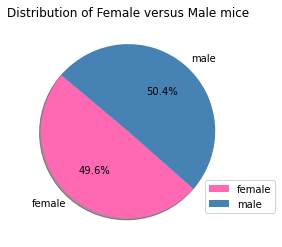

In [96]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie([female, male], labels=["female","male"], colors=["hotpink","steelblue"],
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Distribution of Female versus Male mice')
plt.legend(bbox_to_anchor=(1.2, 0.1), loc='lower right')
plt.savefig("graphs/pieusingpyplot.png", bbox_inches = "tight")
plt.show()

## Quartiles, Outliers and Boxplots

In [97]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = pd.DataFrame(cleanmicestudy.groupby(['Mouse ID'])['Timepoint'].max())
newdf= pd.merge(cleanmicestudy, greatest_timepoint, on=('Mouse ID', 'Timepoint'), how='right')
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newdf

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [100]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
regimen = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for item in treatments:
    
      # Locate the rows which contain mice on each drug and get the tumor volumes
    newtreatments=newdf.loc[newdf["Drug Regimen"] == item, 'Tumor Volume (mm3)']

    # add subset
    regimen.append(newtreatments)
    # Determine outliers using upper and lower bounds
    quartiles = newtreatments.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = newtreatments.loc[(newtreatments < lower_bound) | (newtreatments > upper_bound)]
    print(f"{item}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


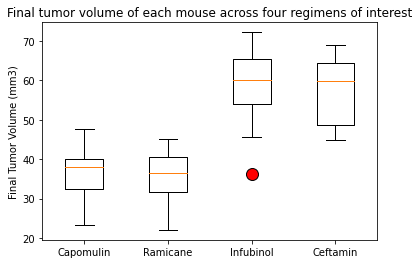

In [110]:
orange_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(regimen, labels = treatments,flierprops=orange_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Final tumor volume of each mouse across four regimens of interest")
plt.savefig("graphs/boxplot.png", bbox_inches = "tight")
plt.show()


## Line and Scatter Plots

In [106]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin =cleanmicestudy.loc[cleanmicestudy['Drug Regimen'] == 'Capomulin']
capomice = Capomulin.loc[Capomulin["Mouse ID"] == "s185",:]
capomice.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


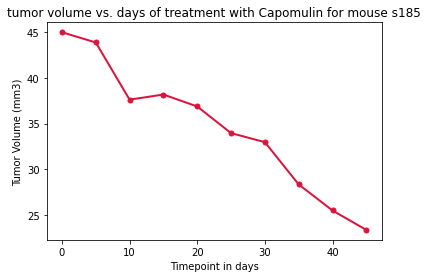

In [107]:
plt.plot(capomice["Timepoint"],capomice["Tumor Volume (mm3)"], linewidth=2, markersize=5, marker="o", color="crimson")
plt.xlabel("Timepoint in days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("tumor volume vs. days of treatment with Capomulin for mouse s185")

plt.savefig("graphs/lineplot.png", bbox_inches = "tight")
plt.show()


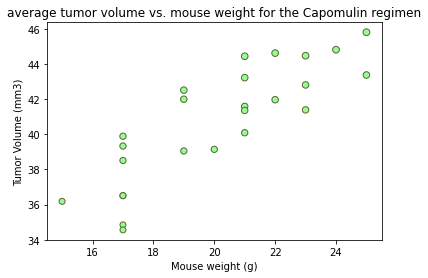

In [108]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin
capotumorandweigh = Capomulin.groupby(['Mouse ID']).agg(
               weight=('Weight (g)', np.mean),
              Tumormean=('Tumor Volume (mm3)', np.mean))
plt.scatter(
    capotumorandweigh['weight'],
    capotumorandweigh['Tumormean'],
    marker='o',
    facecolors='palegreen',
    edgecolors='darkolivegreen',
    s=capotumorandweigh['Tumormean'])

plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.savefig("graphs/scatterplot.png", bbox_inches = "tight")
plt.show()


## Correlation and Regression

The r-squared is: 0.8419363424694721


C:\Users\natal\AppData\Local\Temp/ipykernel_5856/3390408155.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(x,regress_values,"r-",color="darkviolet")


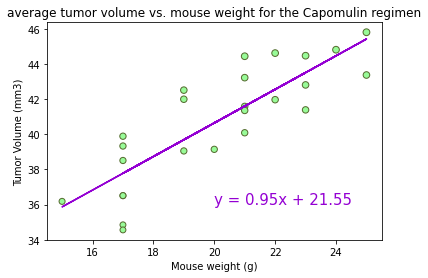

In [109]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capotumorandweigh['weight'],capotumorandweigh['Tumormean'])


x = capotumorandweigh['weight']
y = capotumorandweigh['Tumormean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept

line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
plt.scatter(x,y, marker='o',
    facecolors='palegreen',
    edgecolors='darkolivegreen',
    s=capotumorandweigh['Tumormean'])
plt.plot(x,regress_values,"r-",color="darkviolet")
plt.annotate(line_eq,(20,36),fontsize=15,color="darkviolet")
plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Mouse weight (g)")
plt.ylabel("Tumor Volume (mm3)")
print(f"The r-squared is: {rvalue}")
plt.savefig("graphs/regplot.png", bbox_inches = "tight")
plt.show()
